<a href="https://colab.research.google.com/drive/1Ohbu1EgL06hQwXLKyAWvDEJeOnufZ0qD">Abre este Jupyter en Google Colab</a>

# Introducción a Pandas

[Pandas](https://pandas.pydata.org/about/index.html) es una librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar. 
* La estructura de datos principal es el DataFrame, que puede considerarse como una tabla 2D en memoria (como una hoja de cálculo, con nombres de columna y etiquetas de fila). 
* Muchas funciones disponibles en Excel están disponibles mediante programación, como crear tablas dinámicas, calcular columnas basadas en otras columnas, trazar gráficos, etc.
* Proporciona un alto rendimiento para manipular (unir, dividir, modificar…) grandes conjuntos de datos

## Import

In [2]:
# Instalación de Pandas
# !pip install pandas
# !pip install pyarrow

In [3]:
import pandas as pd

## Estructuras de datos en Pandas

La librería Pandas, de manera genérica, contiene las siguientes estructuras de datos:
* **Series**: Array de una dimensión
* **DataFrame**: Se corresponde con una tabla de 2 dimensiones
* **Panel**: Similar a un diccionario de DataFrames

## Creación del objeto Series

In [4]:
# Creacion de un objeto Series
s = pd.Series([2, 4, 6, 8, 10])
print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [5]:
# Creación de un objeto Series inicializándolo con un diccionario de Python
altura = {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}
s = pd.Series(altura)
print(s)

Santiago    187
Pedro       178
Julia       170
Ana         165
dtype: int64


In [6]:
# Creación de un objeto Series inicializándolo con algunos 
# de los elementos de un diccionario de Python
altura = {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}
s = pd.Series(altura, index = ["Pedro", "Julia"])
print(s)

Pedro    178
Julia    170
dtype: int64


In [7]:
# Creación de un objeto Series inicializandolo con un escalar
s = pd.Series(34, ["test1", "test2", "test3"])
print(s)

test1    34
test2    34
test3    34
dtype: int64


## Acceso a los elementos de un objeto Series

Cada elemento en un objeto Series tiene un identificador único que se denomina **_index label_**.

In [8]:
# Creación de un objeto Series
s = pd.Series([2, 4, 6, 8], index=["num1", "num2", "num3", "num4"])
print(s)

num1    2
num2    4
num3    6
num4    8
dtype: int64


In [9]:
# Accediendo al tercer elemento del objeto
s["num3"]

np.int64(6)

In [10]:
# Tambien se puede acceder al elemento por posición
s[2]

C:\Users\lessj\AppData\Local\Temp\ipykernel_21188\360602738.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[2]


np.int64(6)

In [11]:
# loc es la forma estándar de acceder a un elemento de un objeto Series por atributo
s.loc["num3"]

np.int64(6)

In [12]:
# iloc es la forma estándar de acceder a un elemento de un objeto Series por posición
s.iloc[2]

np.int64(6)

In [13]:
# Accediendo al segundo y tercer elemento por posición
s.iloc[2:4]

num3    6
num4    8
dtype: int64

## Operaciones aritméticas con Series

In [14]:
# Creacion de un objeto Series
s = pd.Series([2, 4, 6, 8, 10])
print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [15]:
# Los objeto Series son similares y compatibles con los Arrays de Numpy
import numpy as np
# Ufunc de Numpy para sumar los elementos de un Array
np.sum(s)

np.int64(30)

In [16]:
# El resto de operaciones aritméticas de Numpy sobre Arrays también son posibles
# Más información al respecto en la Introducción a Numpy
s * 2

0     4
1     8
2    12
3    16
4    20
dtype: int64

## Representación gráfica de un objeto Series

In [17]:
# Creación de un objeto Series denominado Temperaturas
temperaturas = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9]
s = pd.Series(temperaturas, name="Temperaturas")
s

0     4.4
1     5.1
2     6.1
3     6.2
4     6.1
5     6.1
6     5.7
7     5.2
8     4.7
9     4.1
10    3.9
Name: Temperaturas, dtype: float64

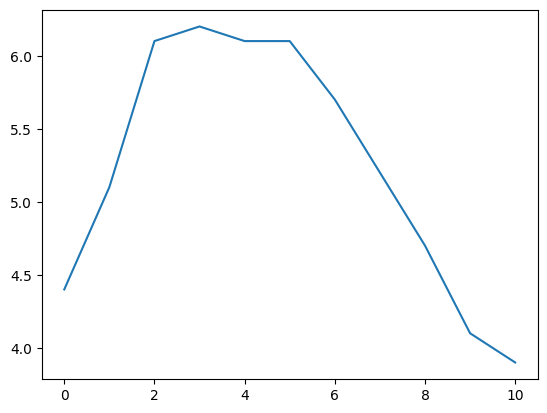

In [18]:
# Representación gráfica del objeto Series
%matplotlib inline
import matplotlib.pyplot as plt

s.plot()
plt.show()

## Creación de un objeto DataFrame

In [19]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


Puede forzarse al DataFrame a que presente unas columnas determinadas y en un orden determinado

In [20]:
# Creación de un DataFrame inicializándolo con algunos elementos de un diccionario
# de objetos Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(
        personas,
        columns = ["altura", "peso"],
        index = ["Ana", "Julia", "Santiago"])
df

,altura,peso
Ana,165,56
Julia,170,64
Santiago,187,84


In [21]:
# Creación de un DataFrame inicializándolo con una lista de listas de Python
# Importante: Deben especificarse las columnas e indices por separado
valores = [
    [185, 4, 76],
    [170, 0, 65],
    [190, 1, 89]
]

df = pd.DataFrame(
        valores,
        columns = ["altura", "hijos", "peso"],
        index = ["Pedro", "Ana", "Juan"])
df

,altura,hijos,peso
Pedro,185,4,76
Ana,170,0,65
Juan,190,1,89


In [22]:
# Creación de un DataFrame inicializándolo con un diccionario de Python
personas = {
    "altura": {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}, 
    "peso": {"Santiago": 87, "Pedro": 78, "Julia": 70, "Ana": 65}}

df = pd.DataFrame(personas)
df

,altura,peso
Santiago,187,87
Pedro,178,78
Julia,170,70
Ana,165,65


## Acceso a los elementos de un DataFrame

In [23]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


### Acceso a los elementos de las columnas del DataFrame

In [24]:
df["peso"]

Ana         56
Julia       64
Pedro       90
Santiago    84
Name: peso, dtype: int64

In [25]:
df[["peso", "altura"]]

,peso,altura
Ana,56,165
Julia,64,170
Pedro,90,178
Santiago,84,187


In [26]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df["peso"] > 80

Ana         False
Julia       False
Pedro        True
Santiago     True
Name: peso, dtype: bool

In [27]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df[df["peso"] > 80]

,peso,altura,hijos
Pedro,90,178,2.0
Santiago,84,187,NaN


### Acceso a los elementos de las filas del DataFrame

In [28]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [29]:
df.loc["Pedro"]

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [30]:
df.iloc[2]

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [31]:
df.iloc[1:3]

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0


### Consulta avanzada de los elementos de un DataFrame

In [32]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [33]:
df.query("altura >= 170 and peso > 60")

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


## Copiar un DataFrame

In [34]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [35]:
# Copia del DataFrame df en df_copy
# Importante: Al modificar un elemento de df_copy no se modifica df
df_copy = df.copy()

## Modificación de un DataFrame

In [36]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [37]:
# Añadir una nueva columna al DataFrame
df["cumpleaños"] = [1990, 1987, 1980, 1994]
df

,peso,altura,hijos,cumpleaños
Ana,56,165,NaN,1990
Julia,64,170,3.0,1987
Pedro,90,178,2.0,1980
Santiago,84,187,NaN,1994


In [38]:
# Añadir una nueva columna calculada al DataFrame
df["años"] = 2020 - df["cumpleaños"]
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,30
Julia,64,170,3.0,1987,33
Pedro,90,178,2.0,1980,40
Santiago,84,187,NaN,1994,26


In [39]:
# Añadir una nueva columna creando un DataFrame nuevo
df_mod = df.assign(mascotas = [1, 3, 0, 0])
df_mod

,peso,altura,hijos,cumpleaños,años,mascotas
Ana,56,165,NaN,1990,30,1
Julia,64,170,3.0,1987,33,3
Pedro,90,178,2.0,1980,40,0
Santiago,84,187,NaN,1994,26,0


In [40]:
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,30
Julia,64,170,3.0,1987,33
Pedro,90,178,2.0,1980,40
Santiago,84,187,NaN,1994,26


In [41]:
# Eliminar una columna existente del DataFrame
del df["peso"]
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,30
Julia,170,3.0,1987,33
Pedro,178,2.0,1980,40
Santiago,187,NaN,1994,26


In [42]:
# Eliminar una columna existente devolviendo una copia del DataFrame resultante
df_mod = df.drop(["hijos"], axis=1)
df_mod

,altura,cumpleaños,años
Ana,165,1990,30
Julia,170,1987,33
Pedro,178,1980,40
Santiago,187,1994,26


In [43]:
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,30
Julia,170,3.0,1987,33
Pedro,178,2.0,1980,40
Santiago,187,NaN,1994,26


## Evaluación de expresiones sobre un DataFrame

In [44]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [45]:
# Evaluar una función sobre una columna del DataFrame
df.eval("altura / 2")

Ana         82.5
Julia       85.0
Pedro       89.0
Santiago    93.5
Name: altura, dtype: float64

In [46]:
# Asignar el valor resultante como una nueva columna
df.eval("media_altura = altura / 2", inplace=True)
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


In [47]:
# Evaluar una función utilizando una variable local
max_altura = 180
df.eval("altura > @max_altura")

Ana         False
Julia       False
Pedro       False
Santiago     True
Name: altura, dtype: bool

In [48]:
# Aplicar una función externa a una columna del DataFrame
def func(x):
    return x + 2

df["peso"].apply(func)

Ana         58
Julia       66
Pedro       92
Santiago    86
Name: peso, dtype: int64

In [49]:
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


## Guardar y Cargar el DataFrame

In [50]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [51]:
# Guardar el DataFrame como CSV, HTML y JSON
df.to_csv("df_personas.csv")
df.to_html("df_personas.html")
df.to_json("df_personas.json")

In [52]:
# Cargar el DataFrame en Jupyter
df2 = pd.read_csv("df_personas.csv")

In [53]:
df2

,Unnamed: 0,peso,altura,hijos
0,Ana,56,165,NaN
1,Julia,64,170,3.0
2,Pedro,90,178,2.0
3,Santiago,84,187,NaN


In [54]:
# Cargar el DataFrame con la primera columna correctamente asignada
df2 = pd.read_csv("df_personas.csv", index_col=0)
df2

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


ANÁLISIS DE CAÍDA LIBRE
    tiempo_s  distancia_m  distancia_cm  velocidad_m/s  aceleracion_m/s2
0        0.0    -0.043300     -4.329998            NaN               NaN
1        0.1    -0.041909     -4.190914       0.013908               NaN
2        0.2     0.274920     27.491984       3.168290         31.543815
3        0.3     0.531634     53.163403       2.567142         -6.011481
4        0.4     0.744765     74.476500       2.131310         -4.358321
5        0.5     1.260303    126.030288       5.155379         30.240692
6        0.6     1.730018    173.001799       4.697151         -4.582278
7        0.7     2.397333    239.733266       6.673147         19.759956
8        0.8     3.080392    308.039175       6.830591          1.574443
9        0.9     4.068246    406.824557       9.878538         30.479472
10       1.0     4.890019    489.001936       8.217738        -16.608003

Gravedad experimental: 9.57 m/s²
Error: 2.45%

Estadísticas de aceleración:
count     9.000000
mean

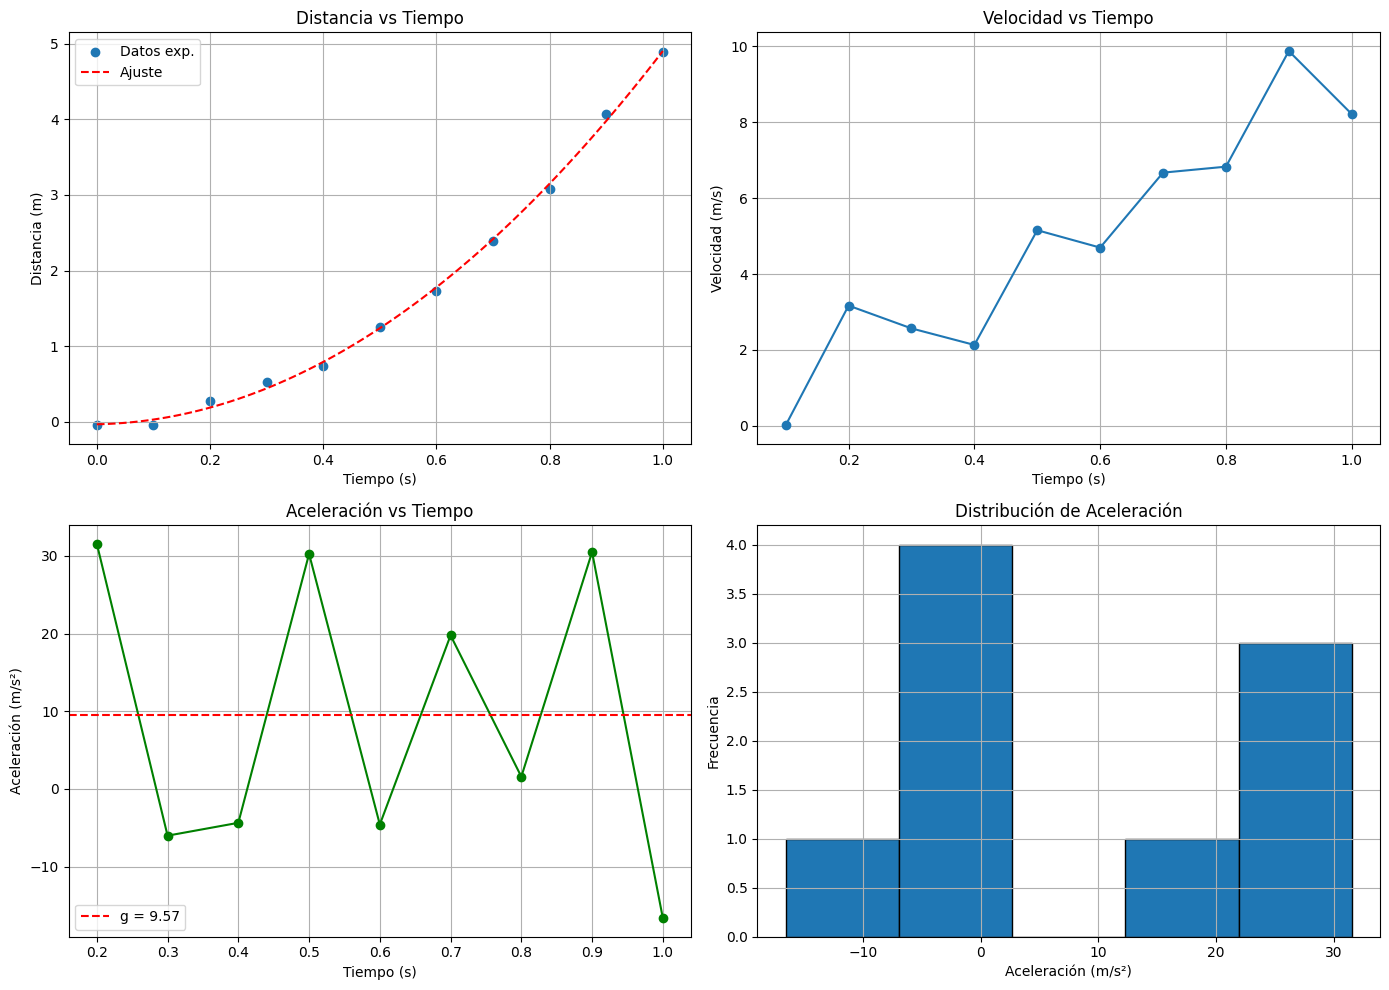

,tiempo_s,distancia_m,distancia_cm,velocidad_m/s,aceleracion_m/s2
0,0.0,-0.043300,-4.329998,NaN,NaN
1,0.1,-0.041909,-4.190914,0.013908,NaN
2,0.2,0.274920,27.491984,3.168290,31.543815
3,0.3,0.531634,53.163403,2.567142,-6.011481
4,0.4,0.744765,74.476500,2.131310,-4.358321
5,0.5,1.260303,126.030288,5.155379,30.240692
6,0.6,1.730018,173.001799,4.697151,-4.582278
7,0.7,2.397333,239.733266,6.673147,19.759956
8,0.8,3.080392,308.039175,6.830591,1.574443
9,0.9,4.068246,406.824557,9.878538,30.479472


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def caida_libre_experimental():
    """
    Analiza datos experimentales de caída libre y calcula 'g'
    """
    # Simular datos experimentales con error
    tiempos = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    g_real = 9.81
    # Distancia con pequeño error experimental
    distancias = 0.5 * g_real * tiempos**2 + np.random.normal(0, 0.05, len(tiempos))
    
    # Crear DataFrame
    df = pd.DataFrame({
        'tiempo_s': tiempos,
        'distancia_m': distancias,
        'distancia_cm': distancias * 100
    })
    
    # Calcular velocidad instantánea (aproximada)
    df['velocidad_m/s'] = df['distancia_m'].diff() / df['tiempo_s'].diff()
    
    # Calcular aceleración
    df['aceleracion_m/s2'] = df['velocidad_m/s'].diff() / df['tiempo_s'].diff()
    
    # Ajuste polinomial para calcular g
    coef = np.polyfit(df['tiempo_s'], df['distancia_m'], 2)
    g_experimental = 2 * coef[0]
    
    print("=" * 60)
    print("ANÁLISIS DE CAÍDA LIBRE")
    print("=" * 60)
    print(df.to_string())
    print(f"\nGravedad experimental: {g_experimental:.2f} m/s²")
    print(f"Error: {abs(g_experimental - g_real)/g_real * 100:.2f}%")
    
    # Estadísticas
    print("\nEstadísticas de aceleración:")
    print(df['aceleracion_m/s2'].describe())
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].scatter(df['tiempo_s'], df['distancia_m'], label='Datos exp.')
    t_fit = np.linspace(0, 1, 100)
    axes[0, 0].plot(t_fit, np.polyval(coef, t_fit), 'r--', label='Ajuste')
    axes[0, 0].set_xlabel('Tiempo (s)')
    axes[0, 0].set_ylabel('Distancia (m)')
    axes[0, 0].set_title('Distancia vs Tiempo')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].plot(df['tiempo_s'], df['velocidad_m/s'], 'o-')
    axes[0, 1].set_xlabel('Tiempo (s)')
    axes[0, 1].set_ylabel('Velocidad (m/s)')
    axes[0, 1].set_title('Velocidad vs Tiempo')
    axes[0, 1].grid(True)
    
    axes[1, 0].plot(df['tiempo_s'], df['aceleracion_m/s2'], 'o-', color='green')
    axes[1, 0].axhline(y=g_experimental, color='r', linestyle='--', label=f'g = {g_experimental:.2f}')
    axes[1, 0].set_xlabel('Tiempo (s)')
    axes[1, 0].set_ylabel('Aceleración (m/s²)')
    axes[1, 0].set_title('Aceleración vs Tiempo')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    axes[1, 1].hist(df['aceleracion_m/s2'].dropna(), bins=5, edgecolor='black')
    axes[1, 1].set_xlabel('Aceleración (m/s²)')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].set_title('Distribución de Aceleración')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
caida_libre_experimental()


ANÁLISIS DE COLISIONES
   experimento  p_inicial  p_final  diferencia_momento_%  energia_perdida_% tipo_colision
0            1       1.00    1.000              0.000000          13.500000    Inelástica
1            2       1.25    1.248              0.160000          13.699840    Inelástica
2            3       1.50    1.499              0.066667          13.382889    Inelástica
3            4       0.75    0.747              0.400000          13.597333    Inelástica
4            5       1.10    1.099              0.090909          13.340083    Inelástica
5            6       1.40    1.400              0.000000          13.500000    Inelástica
6            7       0.90    0.872              3.111111          19.920988    Inelástica
7            8       1.15    1.147              0.260870          13.564083    Inelástica
8            9       1.30    1.299              0.076923          13.364793    Inelástica
9           10       1.05    1.048              0.190476          13.737868 

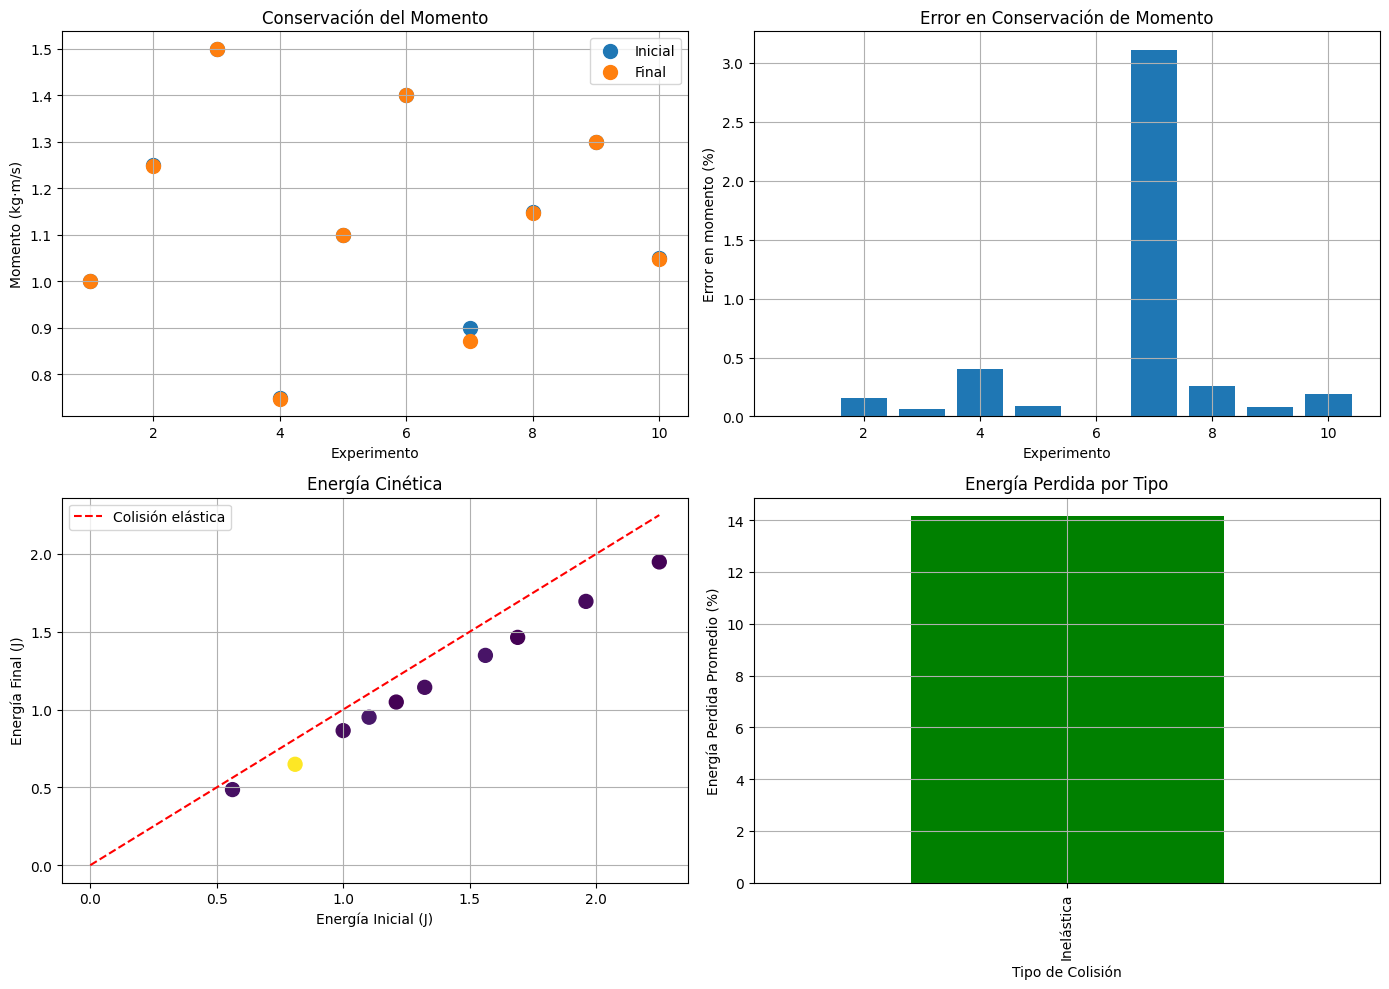

,experimento,m1_kg,m2_kg,v1_inicial_m/s,v2_inicial_m/s,v1_final_m/s,v2_final_m/s,p_inicial,p_final,diferencia_momento_%,Ec_inicial,Ec_final,energia_perdida_%,tipo_colision
0,1,0.5,0.3,2.0,0.0,0.65,2.25,1.00,1.000,0.000000,1.0000,0.865000,13.500000,Inelástica
1,2,0.5,0.3,2.5,0.0,0.81,2.81,1.25,1.248,0.160000,1.5625,1.348440,13.699840,Inelástica
2,3,0.5,0.3,3.0,0.0,0.97,3.38,1.50,1.499,0.066667,2.2500,1.948885,13.382889,Inelástica
3,4,0.5,0.3,1.5,0.0,0.48,1.69,0.75,0.747,0.400000,0.5625,0.486015,13.597333,Inelástica
4,5,0.5,0.3,2.2,0.0,0.71,2.48,1.10,1.099,0.090909,1.2100,1.048585,13.340083,Inelástica
5,6,0.5,0.3,2.8,0.0,0.91,3.15,1.40,1.400,0.000000,1.9600,1.695400,13.500000,Inelástica
6,7,0.5,0.3,1.8,0.0,0.58,1.94,0.90,0.872,3.111111,0.8100,0.648640,19.920988,Inelástica
7,8,0.5,0.3,2.3,0.0,0.74,2.59,1.15,1.147,0.260870,1.3225,1.143115,13.564083,Inelástica
8,9,0.5,0.3,2.6,0.0,0.84,2.93,1.30,1.299,0.076923,1.6900,1.464135,13.364793,Inelástica
9,10,0.5,0.3,2.1,0.0,0.68,2.36,1.05,1.048,0.190476,1.1025,0.951040,13.737868,Inelástica


In [56]:
def analisis_colisiones():
    """
    Analiza conservación de momento en colisiones
    """
    # Datos de múltiples experimentos de colisión
    datos = {
        'experimento': range(1, 11),
        'm1_kg': [0.5] * 10,
        'm2_kg': [0.3] * 10,
        'v1_inicial_m/s': [2.0, 2.5, 3.0, 1.5, 2.2, 2.8, 1.8, 2.3, 2.6, 2.1],
        'v2_inicial_m/s': [0.0] * 10,
        'v1_final_m/s': [0.65, 0.81, 0.97, 0.48, 0.71, 0.91, 0.58, 0.74, 0.84, 0.68],
        'v2_final_m/s': [2.25, 2.81, 3.38, 1.69, 2.48, 3.15, 1.94, 2.59, 2.93, 2.36]
    }
    
    df = pd.DataFrame(datos)
    
    # Calcular momento inicial y final
    df['p_inicial'] = df['m1_kg'] * df['v1_inicial_m/s'] + df['m2_kg'] * df['v2_inicial_m/s']
    df['p_final'] = df['m1_kg'] * df['v1_final_m/s'] + df['m2_kg'] * df['v2_final_m/s']
    df['diferencia_momento_%'] = abs(df['p_final'] - df['p_inicial']) / df['p_inicial'] * 100
    
    # Calcular energía cinética
    df['Ec_inicial'] = 0.5 * df['m1_kg'] * df['v1_inicial_m/s']**2
    df['Ec_final'] = 0.5 * (df['m1_kg'] * df['v1_final_m/s']**2 + df['m2_kg'] * df['v2_final_m/s']**2)
    df['energia_perdida_%'] = (df['Ec_inicial'] - df['Ec_final']) / df['Ec_inicial'] * 100
    
    # Clasificar tipo de colisión
    df['tipo_colision'] = df['energia_perdida_%'].apply(
        lambda x: 'Elástica' if x < 5 else 'Inelástica'
    )
    
    print("\n" + "=" * 80)
    print("ANÁLISIS DE COLISIONES")
    print("=" * 80)
    print(df[['experimento', 'p_inicial', 'p_final', 'diferencia_momento_%', 
              'energia_perdida_%', 'tipo_colision']].to_string())
    
    # Estadísticas agrupadas
    print("\nEstadísticas por tipo de colisión:")
    print(df.groupby('tipo_colision').agg({
        'diferencia_momento_%': ['mean', 'std'],
        'energia_perdida_%': ['mean', 'std']
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].scatter(df['experimento'], df['p_inicial'], label='Inicial', s=100)
    axes[0, 0].scatter(df['experimento'], df['p_final'], label='Final', s=100)
    axes[0, 0].set_xlabel('Experimento')
    axes[0, 0].set_ylabel('Momento (kg·m/s)')
    axes[0, 0].set_title('Conservación del Momento')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].bar(df['experimento'], df['diferencia_momento_%'])
    axes[0, 1].set_xlabel('Experimento')
    axes[0, 1].set_ylabel('Error en momento (%)')
    axes[0, 1].set_title('Error en Conservación de Momento')
    axes[0, 1].grid(True)
    
    axes[1, 0].scatter(df['Ec_inicial'], df['Ec_final'], c=df['energia_perdida_%'], 
                       cmap='viridis', s=100)
    axes[1, 0].plot([0, df['Ec_inicial'].max()], [0, df['Ec_inicial'].max()], 
                    'r--', label='Colisión elástica')
    axes[1, 0].set_xlabel('Energía Inicial (J)')
    axes[1, 0].set_ylabel('Energía Final (J)')
    axes[1, 0].set_title('Energía Cinética')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    df.groupby('tipo_colision')['energia_perdida_%'].mean().plot(kind='bar', 
                                                                   ax=axes[1, 1], 
                                                                   color=['green', 'orange'])
    axes[1, 1].set_xlabel('Tipo de Colisión')
    axes[1, 1].set_ylabel('Energía Perdida Promedio (%)')
    axes[1, 1].set_title('Energía Perdida por Tipo')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_colisiones()


ANÁLISIS LEY DE OHM
   voltaje_V  corriente_R1_100Ω_A  potencia_R1_100Ω_W  corriente_R2_220Ω_A  potencia_R2_220Ω_W  corriente_R3_470Ω_A  potencia_R3_470Ω_W  corriente_R4_1kΩ_A  potencia_R4_1kΩ_W
0        0.0             0.000000            0.000000             0.000000            0.000000             0.000000            0.000000            0.000000           0.000000
1        1.0             0.009879            0.009879             0.004482            0.004482             0.002126            0.002126            0.001028           0.001028
2        2.0             0.019899            0.039798             0.009284            0.018569             0.004062            0.008125            0.001986           0.003971
3        3.0             0.030059            0.090178             0.013600            0.040800             0.006437            0.019312            0.003036           0.009107
4        4.0             0.039418            0.157672             0.018656            0.074623          

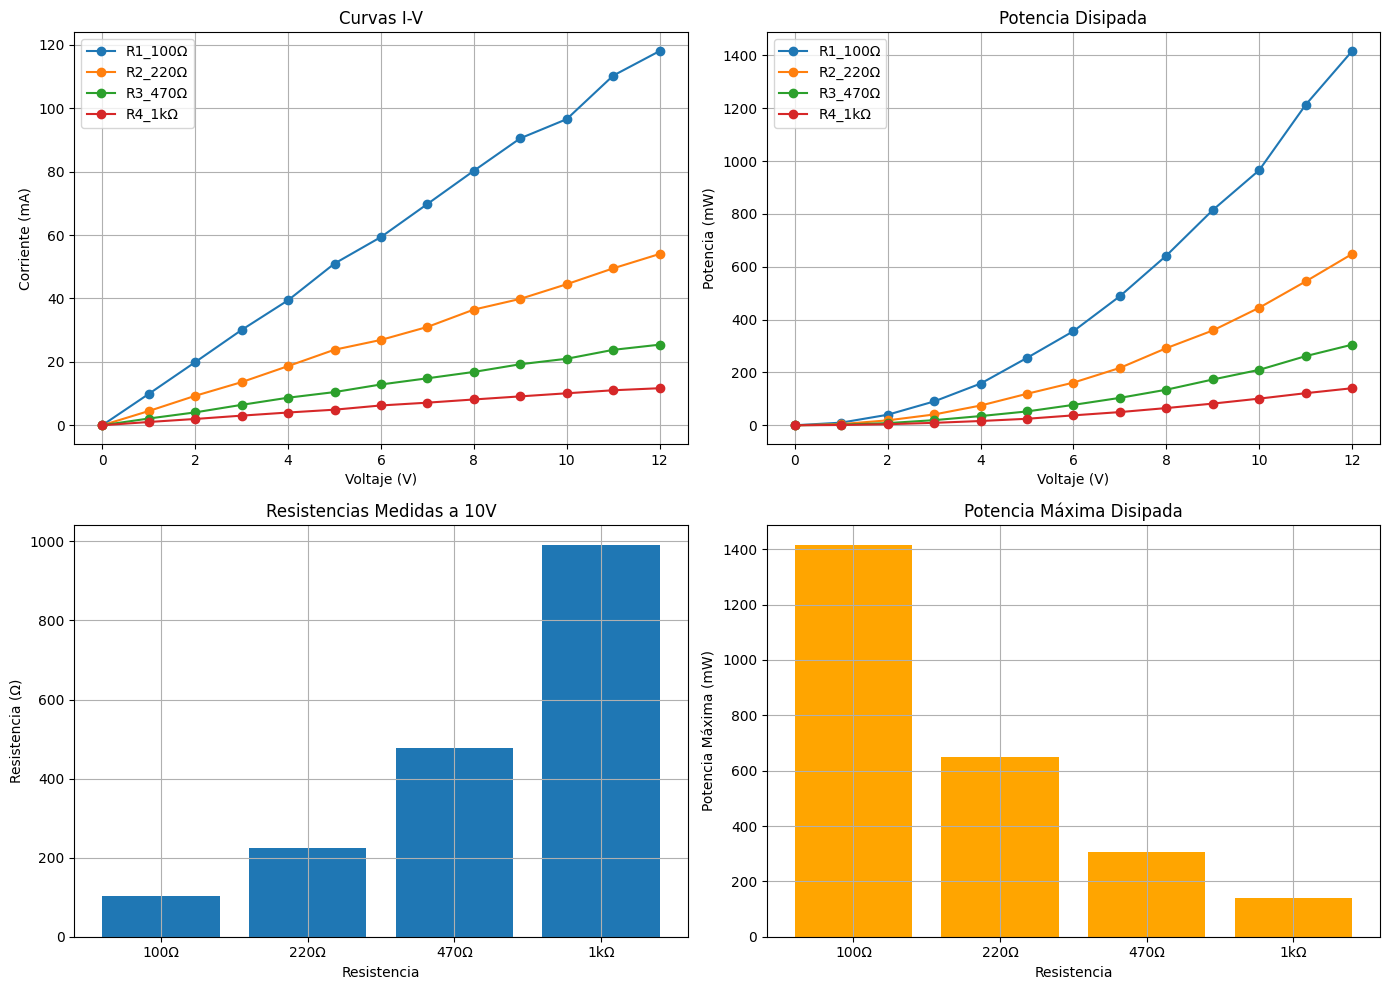

,voltaje_V,corriente_R1_100Ω_A,potencia_R1_100Ω_W,corriente_R2_220Ω_A,potencia_R2_220Ω_W,corriente_R3_470Ω_A,potencia_R3_470Ω_W,corriente_R4_1kΩ_A,potencia_R4_1kΩ_W
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.009879,0.009879,0.004482,0.004482,0.002126,0.002126,0.001028,0.001028
2,2.0,0.019899,0.039798,0.009284,0.018569,0.004062,0.008125,0.001986,0.003971
3,3.0,0.030059,0.090178,0.013600,0.040800,0.006437,0.019312,0.003036,0.009107
4,4.0,0.039418,0.157672,0.018656,0.074623,0.008689,0.034757,0.004021,0.016085
5,5.0,0.051001,0.255007,0.023826,0.119128,0.010464,0.052321,0.004912,0.024560
6,6.0,0.059367,0.356203,0.026914,0.161487,0.012865,0.077193,0.006247,0.037483
7,7.0,0.069789,0.488525,0.031009,0.217061,0.014814,0.103701,0.007126,0.049885
8,8.0,0.080260,0.642083,0.036481,0.291849,0.016821,0.134568,0.008136,0.065085
9,9.0,0.090509,0.814580,0.039859,0.358731,0.019244,0.173197,0.009109,0.081982


In [57]:

def analisis_ley_ohm():
    """
    Analiza datos experimentales de la Ley de Ohm
    """
    # Datos de múltiples resistencias
    voltajes = np.linspace(0, 12, 13)
    
    resistencias = {
        'R1_100Ω': 100,
        'R2_220Ω': 220,
        'R3_470Ω': 470,
        'R4_1kΩ': 1000
    }
    
    datos = {'voltaje_V': voltajes}
    
    for nombre, R in resistencias.items():
        # Corriente con pequeño error experimental
        I_teorica = voltajes / R
        I_experimental = I_teorica + np.random.normal(0, I_teorica * 0.02)
        datos[f'corriente_{nombre}_A'] = I_experimental
        datos[f'potencia_{nombre}_W'] = voltajes * I_experimental
    
    df = pd.DataFrame(datos)
    
    print("\n" + "=" * 80)
    print("ANÁLISIS LEY DE OHM")
    print("=" * 80)
    print(df.head(10).to_string())
    
    # Calcular resistencias experimentales
    print("\nResistencias calculadas (promedio):")
    for nombre in resistencias.keys():
        corriente_col = f'corriente_{nombre}_A'
        R_exp = (df['voltaje_V'] / df[corriente_col]).mean()
        R_teorica = resistencias[nombre]
        error = abs(R_exp - R_teorica) / R_teorica * 100
        print(f"{nombre}: {R_exp:.2f} Ω (Error: {error:.2f}%)")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    for nombre in resistencias.keys():
        corriente_col = f'corriente_{nombre}_A'
        axes[0, 0].plot(df['voltaje_V'], df[corriente_col] * 1000, 'o-', label=nombre)
    axes[0, 0].set_xlabel('Voltaje (V)')
    axes[0, 0].set_ylabel('Corriente (mA)')
    axes[0, 0].set_title('Curvas I-V')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    for nombre in resistencias.keys():
        potencia_col = f'potencia_{nombre}_W'
        axes[0, 1].plot(df['voltaje_V'], df[potencia_col] * 1000, 'o-', label=nombre)
    axes[0, 1].set_xlabel('Voltaje (V)')
    axes[0, 1].set_ylabel('Potencia (mW)')
    axes[0, 1].set_title('Potencia Disipada')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Resistencia vs corriente a 10V
    resistencias_exp = []
    nombres_cortos = []
    for nombre in resistencias.keys():
        corriente_col = f'corriente_{nombre}_A'
        R_exp = df.loc[df['voltaje_V'] == 10, 'voltaje_V'].values[0] / \
                df.loc[df['voltaje_V'] == 10, corriente_col].values[0]
        resistencias_exp.append(R_exp)
        nombres_cortos.append(nombre.split('_')[1])
    
    axes[1, 0].bar(nombres_cortos, resistencias_exp)
    axes[1, 0].set_xlabel('Resistencia')
    axes[1, 0].set_ylabel('Resistencia (Ω)')
    axes[1, 0].set_title('Resistencias Medidas a 10V')
    axes[1, 0].grid(True)
    
    # Comparación potencia máxima
    potencias_max = [df[f'potencia_{nombre}_W'].max() * 1000 for nombre in resistencias.keys()]
    axes[1, 1].bar(nombres_cortos, potencias_max, color='orange')
    axes[1, 1].set_xlabel('Resistencia')
    axes[1, 1].set_ylabel('Potencia Máxima (mW)')
    axes[1, 1].set_title('Potencia Máxima Disipada')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_ley_ohm()


ANÁLISIS CARGA/DESCARGA CAPACITOR
Constante de tiempo τ = 1.0000 s

Tiempo para 63.2% de carga: 1.0000 s
Tiempo para 95% de carga: 3.0000 s

Estadísticas por proceso:
         voltaje_V                     corriente_mA                      \
               min       max      mean          min       max      mean   
proceso                                                                   
Carga    -0.129506  9.106015  7.172476     0.006064  0.900000  0.181567   
Descarga -0.035915  8.992524  1.803154    -0.900000 -0.006064 -0.181567   

             energia_J            
                   min       max  
proceso                           
Carga     8.385888e-07  0.004146  
Descarga  1.195174e-08  0.004043  


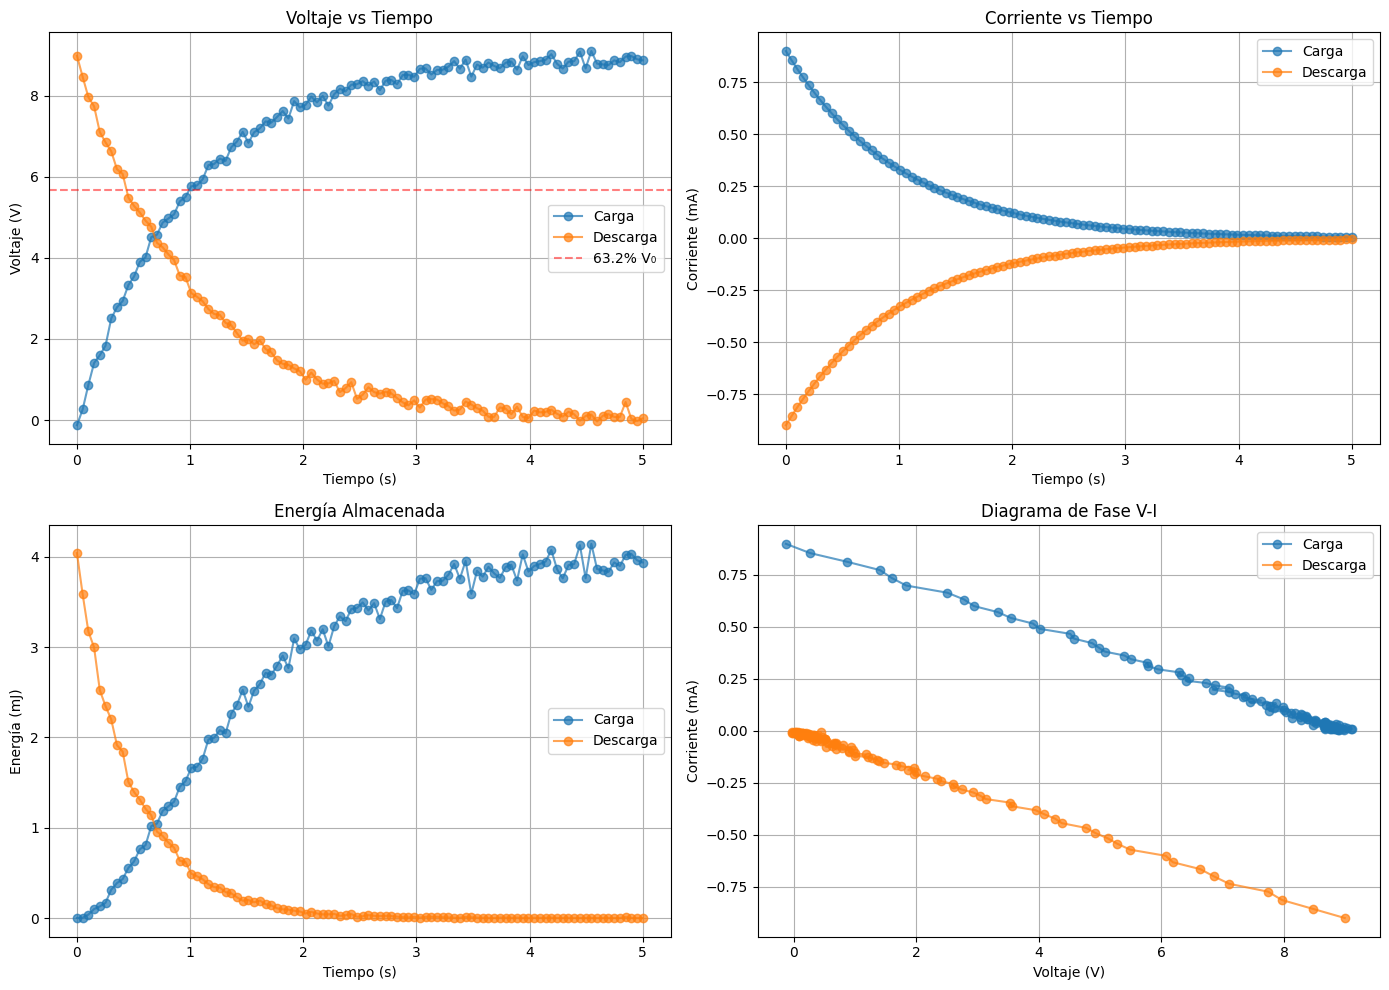

,tiempo_s,voltaje_V,corriente_mA,proceso,energia_J
0,0.000000,-0.129506,0.900000,Carga,8.385888e-07
1,0.050505,0.261456,0.855674,Carga,3.417961e-06
2,0.101010,0.868687,0.813532,Carga,3.773089e-05
3,0.151515,1.406564,0.773464,Carga,9.892104e-05
4,0.202020,1.598631,0.735371,Carga,1.277810e-04
...,...,...,...,...,...
195,4.797980,0.076291,-0.007422,Descarga,2.910150e-07
196,4.848485,0.444132,-0.007056,Descarga,9.862640e-06
197,4.898990,0.027145,-0.006709,Descarga,3.684349e-08
198,4.949495,-0.028495,-0.006378,Descarga,4.059879e-08


In [58]:

def analisis_carga_capacitor():
    """
    Analiza la carga y descarga de un capacitor
    """
    # Parámetros del circuito
    R = 10000  # Ω
    C = 100e-6  # F
    V0 = 9  # V
    tau = R * C
    
    # Datos de carga
    t_carga = np.linspace(0, 5*tau, 100)
    V_carga = V0 * (1 - np.exp(-t_carga/tau)) + np.random.normal(0, 0.1, len(t_carga))
    I_carga = (V0/R) * np.exp(-t_carga/tau) * 1000  # mA
    
    # Datos de descarga
    t_descarga = np.linspace(0, 5*tau, 100)
    V_descarga = V0 * np.exp(-t_descarga/tau) + np.random.normal(0, 0.1, len(t_descarga))
    I_descarga = -(V0/R) * np.exp(-t_descarga/tau) * 1000  # mA
    
    # Crear DataFrames
    df_carga = pd.DataFrame({
        'tiempo_s': t_carga,
        'voltaje_V': V_carga,
        'corriente_mA': I_carga,
        'proceso': 'Carga'
    })
    
    df_descarga = pd.DataFrame({
        'tiempo_s': t_descarga,
        'voltaje_V': V_descarga,
        'corriente_mA': I_descarga,
        'proceso': 'Descarga'
    })
    
    df = pd.concat([df_carga, df_descarga], ignore_index=True)
    
    # Calcular energía almacenada
    df['energia_J'] = 0.5 * C * df['voltaje_V']**2
    
    print("\n" + "=" * 80)
    print("ANÁLISIS CARGA/DESCARGA CAPACITOR")
    print("=" * 80)
    print(f"Constante de tiempo τ = {tau:.4f} s")
    print(f"\nTiempo para 63.2% de carga: {tau:.4f} s")
    print(f"Tiempo para 95% de carga: {3*tau:.4f} s")
    
    print("\nEstadísticas por proceso:")
    print(df.groupby('proceso').agg({
        'voltaje_V': ['min', 'max', 'mean'],
        'corriente_mA': ['min', 'max', 'mean'],
        'energia_J': ['min', 'max']
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[0, 0].plot(data['tiempo_s'], data['voltaje_V'], 'o-', 
                       label=proceso, alpha=0.7)
    axes[0, 0].axhline(y=V0*0.632, color='r', linestyle='--', alpha=0.5, label='63.2% V₀')
    axes[0, 0].set_xlabel('Tiempo (s)')
    axes[0, 0].set_ylabel('Voltaje (V)')
    axes[0, 0].set_title('Voltaje vs Tiempo')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[0, 1].plot(data['tiempo_s'], data['corriente_mA'], 'o-', 
                       label=proceso, alpha=0.7)
    axes[0, 1].set_xlabel('Tiempo (s)')
    axes[0, 1].set_ylabel('Corriente (mA)')
    axes[0, 1].set_title('Corriente vs Tiempo')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[1, 0].plot(data['tiempo_s'], data['energia_J']*1000, 'o-', 
                       label=proceso, alpha=0.7)
    axes[1, 0].set_xlabel('Tiempo (s)')
    axes[1, 0].set_ylabel('Energía (mJ)')
    axes[1, 0].set_title('Energía Almacenada')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Gráfico de fase V-I
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[1, 1].plot(data['voltaje_V'], data['corriente_mA'], 'o-', 
                       label=proceso, alpha=0.7)
    axes[1, 1].set_xlabel('Voltaje (V)')
    axes[1, 1].set_ylabel('Corriente (mA)')
    axes[1, 1].set_title('Diagrama de Fase V-I')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_carga_capacitor()


ANÁLISIS DE DIFRACCIÓN
    orden_m  posicion_m  posicion_mm  intensidad_relativa  angulo_rad  angulo_grados  lambda_calculada_nm
0        -5   -0.571682  -571.681755             0.972243   -0.278417     -15.952101           549.667314
1        -4   -0.451411  -451.410778             1.005647   -0.221986     -12.718846           550.417675
2        -3   -0.334935  -334.935027             1.035436   -0.165928      -9.506961           550.558126
3        -2   -0.223050  -223.049569             1.019744   -0.111066      -6.363603           554.188139
4        -1   -0.109116  -109.116460             1.029758   -0.054504      -3.122860           544.772120
5         0    0.000000     0.000000             1.019781    0.000000       0.000000                  NaN
6         1    0.109959   109.959249             0.993624    0.054924       3.146932           548.967174
7         2    0.221546   221.546048             0.982108    0.110323       6.321056           550.497931
8         3    0.33451

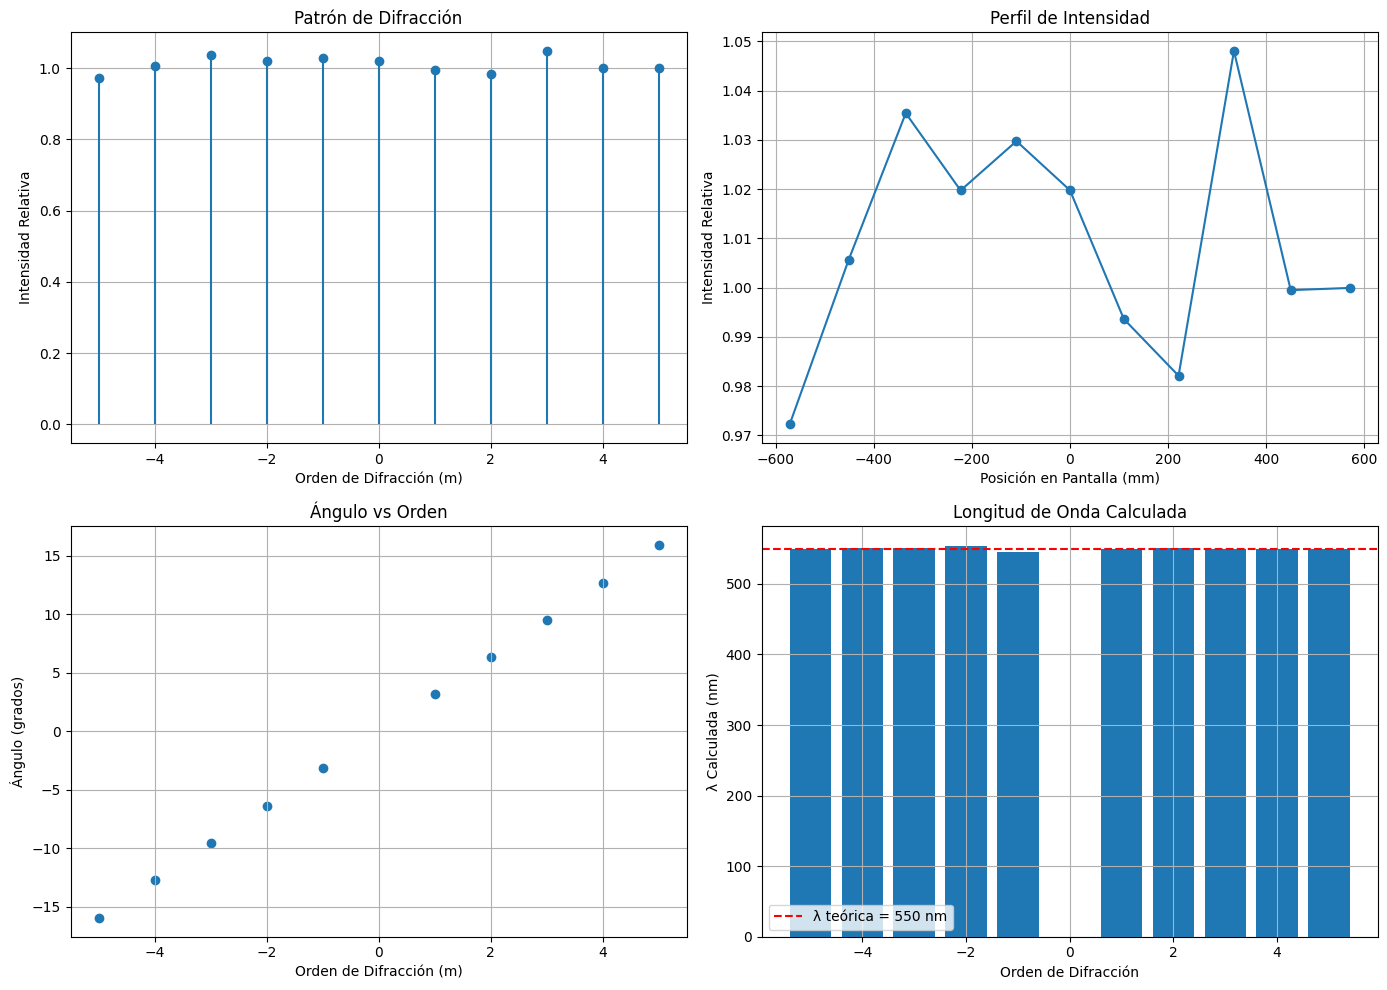

,orden_m,posicion_m,posicion_mm,intensidad_relativa,angulo_rad,angulo_grados,lambda_calculada_nm
0,-5,-0.571682,-571.681755,0.972243,-0.278417,-15.952101,549.667314
1,-4,-0.451411,-451.410778,1.005647,-0.221986,-12.718846,550.417675
2,-3,-0.334935,-334.935027,1.035436,-0.165928,-9.506961,550.558126
3,-2,-0.223050,-223.049569,1.019744,-0.111066,-6.363603,554.188139
4,-1,-0.109116,-109.116460,1.029758,-0.054504,-3.122860,544.772120
5,0,0.000000,0.000000,1.019781,0.000000,0.000000,NaN
6,1,0.109959,109.959249,0.993624,0.054924,3.146932,548.967174
7,2,0.221546,221.546048,0.982108,0.110323,6.321056,550.497931
8,3,0.334511,334.511006,1.048069,0.165722,9.495145,549.880110
9,4,0.450347,450.346590,0.999493,0.221479,12.689834,549.182770


In [59]:
def analisis_difraccion():
    """
    Analiza patrones de difracción de rejilla
    """
    # Parámetros
    lamda = 550e-9  # longitud de onda (m) - luz verde
    d = 1e-5  # espaciado de rejilla (m)
    L = 2.0  # distancia a la pantalla (m)
    
    # Datos experimentales de posiciones de máximos
    datos = []
    for m in range(-5, 6):  # orden de difracción
        if m == 0:
            x = 0
        else:
            theta = np.arcsin(m * lamda / d)
            x = L * np.tan(theta) + np.random.normal(0, 0.001)
        
        intensidad = np.cos(np.pi * d * np.sin(np.arctan(x/L)) / lamda)**2
        
        datos.append({
            'orden_m': m,
            'posicion_m': x,
            'posicion_mm': x * 1000,
            'intensidad_relativa': intensidad + np.random.normal(0, 0.02)
        })
    
    df = pd.DataFrame(datos)
    
    # Calcular ángulos y longitudes de onda
    df['angulo_rad'] = np.arctan(df['posicion_m'] / L)
    df['angulo_grados'] = np.degrees(df['angulo_rad'])
    df['lambda_calculada_nm'] = (d * np.sin(df['angulo_rad']) / df['orden_m']) * 1e9
    
    # Eliminar división por cero para m=0
    df.loc[df['orden_m'] == 0, 'lambda_calculada_nm'] = np.nan
    
    print("\n" + "=" * 80)
    print("ANÁLISIS DE DIFRACCIÓN")
    print("=" * 80)
    print(df.to_string())
    
    print(f"\nLongitud de onda teórica: {lamda*1e9:.2f} nm")
    print(f"Longitud de onda calculada (promedio): {df['lambda_calculada_nm'].mean():.2f} nm")
    print(f"Error estándar: {df['lambda_calculada_nm'].std():.2f} nm")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].stem(df['orden_m'], df['intensidad_relativa'], basefmt=' ')
    axes[0, 0].set_xlabel('Orden de Difracción (m)')
    axes[0, 0].set_ylabel('Intensidad Relativa')
    axes[0, 0].set_title('Patrón de Difracción')
    axes[0, 0].grid(True)
    
    axes[0, 1].plot(df['posicion_mm'], df['intensidad_relativa'], 'o-')
    axes[0, 1].set_xlabel('Posición en Pantalla (mm)')
    axes[0, 1].set_ylabel('Intensidad Relativa')
    axes[0, 1].set_title('Perfil de Intensidad')
    axes[0, 1].grid(True)
    
    df_sin_cero = df[df['orden_m'] != 0]
    axes[1, 0].scatter(df_sin_cero['orden_m'], df_sin_cero['angulo_grados'])
    axes[1, 0].set_xlabel('Orden de Difracción (m)')
    axes[1, 0].set_ylabel('Ángulo (grados)')
    axes[1, 0].set_title('Ángulo vs Orden')
    axes[1, 0].grid(True)
    
    axes[1, 1].bar(df_sin_cero['orden_m'], df_sin_cero['lambda_calculada_nm'])
    axes[1, 1].axhline(y=lamda*1e9, color='r', linestyle='--', 
                       label=f'λ teórica = {lamda*1e9:.0f} nm')
    axes[1, 1].set_xlabel('Orden de Difracción')
    axes[1, 1].set_ylabel('λ Calculada (nm)')
    axes[1, 1].set_title('Longitud de Onda Calculada')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_difraccion()


ANÁLISIS EFECTO FOTOELÉCTRICO
   frecuencia_THz  frecuencia_Hz      lambda_nm  energia_foton_eV  Ek_experimental_J  Ek_experimental_eV  emision
0             0.5   5.000000e+11  600000.000000          0.002068      -3.502195e-19           -2.186139    False
1             0.6   6.000000e+11  500000.000000          0.002482      -3.756583e-19           -2.344933    False
2             0.7   7.000000e+11  428571.428571          0.002895      -3.713806e-19           -2.318231    False
3             0.8   8.000000e+11  375000.000000          0.003309      -3.649532e-19           -2.278110    False
4             0.9   9.000000e+11  333333.333333          0.003722      -3.618716e-19           -2.258874    False
5             1.0   1.000000e+12  300000.000000          0.004136      -3.789265e-19           -2.365334    False
6             1.1   1.100000e+12  272727.272727          0.004550      -3.584450e-19           -2.237484    False
7             1.2   1.200000e+12  250000.000000          

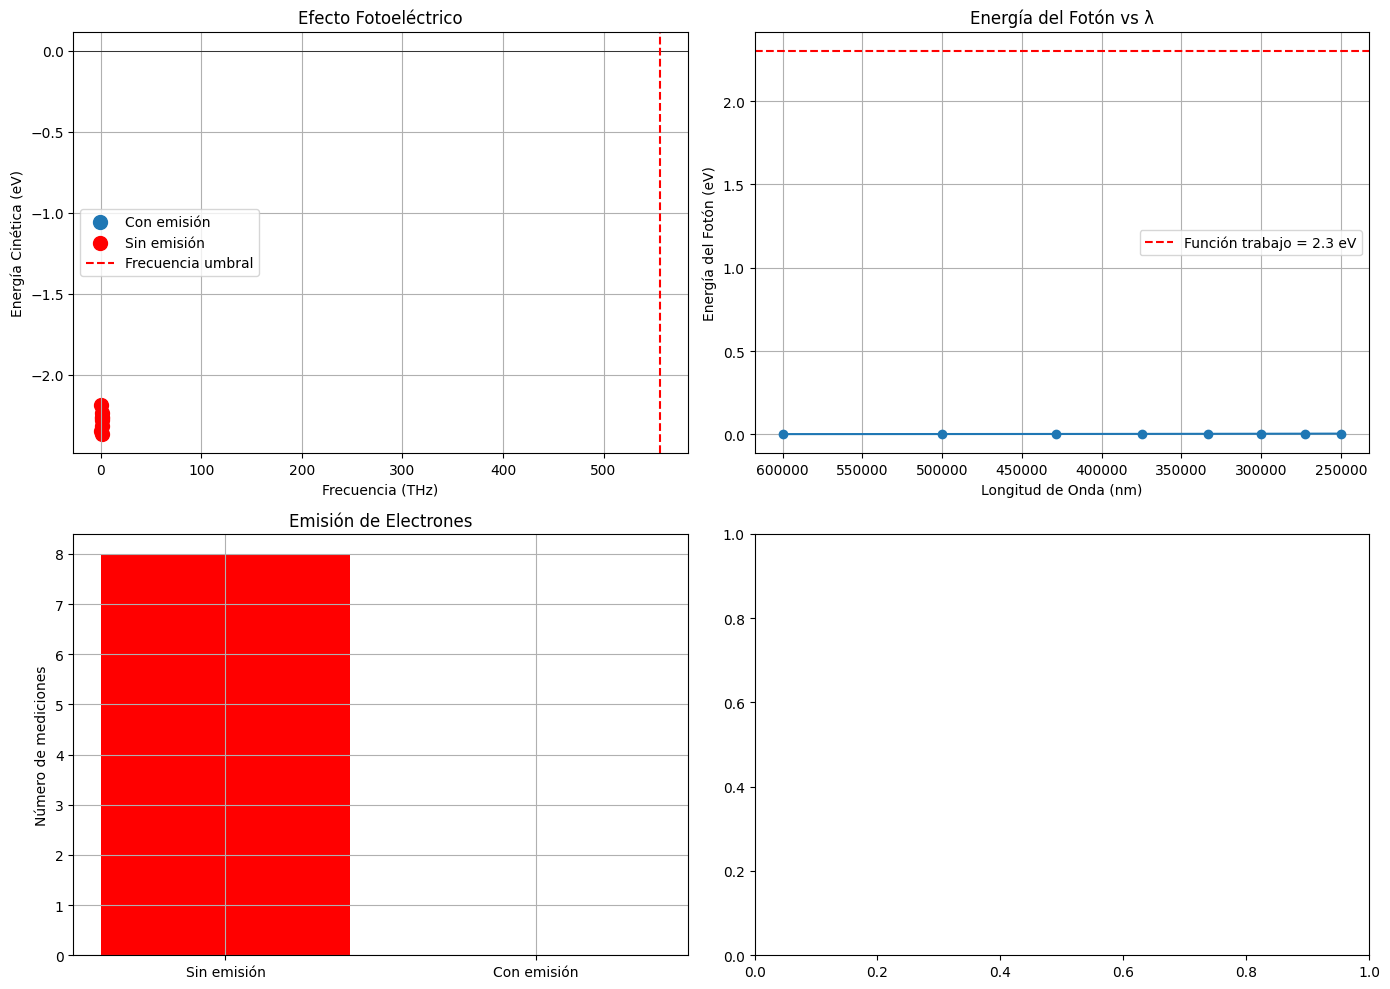

,frecuencia_THz,frecuencia_Hz,lambda_nm,energia_foton_eV,Ek_experimental_J,Ek_experimental_eV,emision
0,0.5,5.000000e+11,600000.000000,0.002068,-3.502195e-19,-2.186139,False
1,0.6,6.000000e+11,500000.000000,0.002482,-3.756583e-19,-2.344933,False
2,0.7,7.000000e+11,428571.428571,0.002895,-3.713806e-19,-2.318231,False
3,0.8,8.000000e+11,375000.000000,0.003309,-3.649532e-19,-2.278110,False
4,0.9,9.000000e+11,333333.333333,0.003722,-3.618716e-19,-2.258874,False
5,1.0,1.000000e+12,300000.000000,0.004136,-3.789265e-19,-2.365334,False
6,1.1,1.100000e+12,272727.272727,0.004550,-3.584450e-19,-2.237484,False
7,1.2,1.200000e+12,250000.000000,0.004963,-3.626224e-19,-2.263561,False


In [60]:
def analisis_efecto_fotoelectrico():
    """
    Analiza datos del efecto fotoeléctrico
    """
    # Constantes
    h = 6.626e-34  # constante de Planck (J·s)
    c = 3e8  # velocidad de la luz (m/s)
    e = 1.602e-19  # carga del electrón (C)
    
    # Función de trabajo del material (eV)
    W0 = 2.3  # ejemplo: sodio
    
    # Datos experimentales
    frecuencias_THz = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])  # THz
    frecuencias_Hz = frecuencias_THz * 1e12
    
    # Energía cinética de electrones emitidos
    Ek_teorica = h * frecuencias_Hz - W0 * e
    Ek_experimental = Ek_teorica + np.random.normal(0, 0.1e-19, len(frecuencias_Hz))
    
    df = pd.DataFrame({
        'frecuencia_THz': frecuencias_THz,
        'frecuencia_Hz': frecuencias_Hz,
        'lambda_nm': (c / frecuencias_Hz) * 1e9,
        'energia_foton_eV': (h * frecuencias_Hz) / e,
        'Ek_experimental_J': Ek_experimental,
        'Ek_experimental_eV': Ek_experimental / e
    })
    
    # Filtrar solo energías positivas (electrones emitidos)
    df['emision'] = df['Ek_experimental_eV'] > 0
    
    # Calcular función de trabajo experimental
    df_emision = df[df['emision']]
    if len(df_emision) > 0:
        # Ajuste lineal: Ek = h*f - W0
        coef = np.polyfit(df_emision['frecuencia_Hz'], 
                         df_emision['Ek_experimental_J'], 1)
        h_exp = coef[0]
        W0_exp = -coef[1] / e
        
        df['Ek_ajuste_J'] = h_exp * df['frecuencia_Hz'] + coef[1]
        df['Ek_ajuste_eV'] = df['Ek_ajuste_J'] / e
    
    print("\n" + "=" * 80)
    print("ANÁLISIS EFECTO FOTOELÉCTRICO")
    print("=" * 80)
    print(df.to_string())
    
    print(f"\nFunción de trabajo teórica: {W0:.2f} eV")
    if len(df_emision) > 0:
        print(f"Función de trabajo experimental: {W0_exp:.2f} eV")
        print(f"Constante de Planck experimental: {h_exp:.3e} J·s")
        print(f"Error en h: {abs(h_exp - h)/h * 100:.2f}%")
    
    print(f"\nFrecuencia umbral teórica: {W0 * e / h / 1e12:.3f} THz")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Gráfico principal: Ek vs frecuencia
    axes[0, 0].scatter(df[df['emision']]['frecuencia_THz'], 
                      df[df['emision']]['Ek_experimental_eV'], 
                      label='Con emisión', s=100)
    axes[0, 0].scatter(df[~df['emision']]['frecuencia_THz'], 
                      df[~df['emision']]['Ek_experimental_eV'], 
                      label='Sin emisión', s=100, color='red')
    if len(df_emision) > 0:
        axes[0, 0].plot(df['frecuencia_THz'], df['Ek_ajuste_eV'], 
                       'g--', label='Ajuste lineal')
    axes[0, 0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axes[0, 0].axvline(x=W0 * e / h / 1e12, color='r', linestyle='--', 
                       label='Frecuencia umbral')
    axes[0, 0].set_xlabel('Frecuencia (THz)')
    axes[0, 0].set_ylabel('Energía Cinética (eV)')
    axes[0, 0].set_title('Efecto Fotoeléctrico')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Energía del fotón vs longitud de onda
    axes[0, 1].plot(df['lambda_nm'], df['energia_foton_eV'], 'o-')
    axes[0, 1].axhline(y=W0, color='r', linestyle='--', 
                       label=f'Función trabajo = {W0} eV')
    axes[0, 1].set_xlabel('Longitud de Onda (nm)')
    axes[0, 1].set_ylabel('Energía del Fotón (eV)')
    axes[0, 1].set_title('Energía del Fotón vs λ')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    axes[0, 1].invert_xaxis()
    
    # Distribución de emisión
    emision_counts = df['emision'].value_counts()
    axes[1, 0].bar(['Sin emisión', 'Con emisión'], 
                   [emision_counts.get(False, 0), emision_counts.get(True, 0)],
                   color=['red', 'green'])
    axes[1, 0].set_ylabel('Número de mediciones')
    axes[1, 0].set_title('Emisión de Electrones')
    axes[1, 0].grid(True)
    
    # Comparación teórica vs experimental
    if len(df_emision) > 0:
        axes[1, 1].scatter(df_emision['energia_foton_eV'], 
                          df_emision['Ek_experimental_eV'])
        x_line = np.linspace(df_emision['energia_foton_eV'].min(), 
                            df_emision['energia_foton_eV'].max(), 100)
        axes[1, 1].plot(x_line, x_line - W0, 'r--', label='Teórico')
        axes[1, 1].set_xlabel('Energía del Fotón (eV)')
        axes[1, 1].set_ylabel('Ek Experimental (eV)')
        axes[1, 1].set_title('Experimental vs Teórico')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_efecto_fotoelectrico()


ANÁLISIS ESPECTROSCÓPICO - SERIE DE BALMER (HIDRÓGENO)
  transicion  n_superior  n_inferior  lambda_teorica_nm  lambda_experimental_nm  frecuencia_THz  energia_eV    color  error_nm   error_%
0        3→2           3           2         656.335460              658.074787      455.875238    1.885536     Rojo  1.739326  0.265006
1        4→2           4           2         486.174415              486.713001      616.379672    2.549396     Azul  0.538586  0.110780
2        5→2           5           2         434.084299              433.983352      691.270756    2.859151  Violeta  0.100947  0.023255
3        6→2           6           2         410.209663              410.653303      730.543254    3.021585  Violeta  0.443640  0.108150
4        7→2           7           2         397.042439              396.633304      756.366137    3.128391  Violeta  0.409135  0.103046

Estadísticas de errores:
Error promedio: 0.646 nm
Error porcentual promedio: 0.122%

Agrupación por color:
        lambda

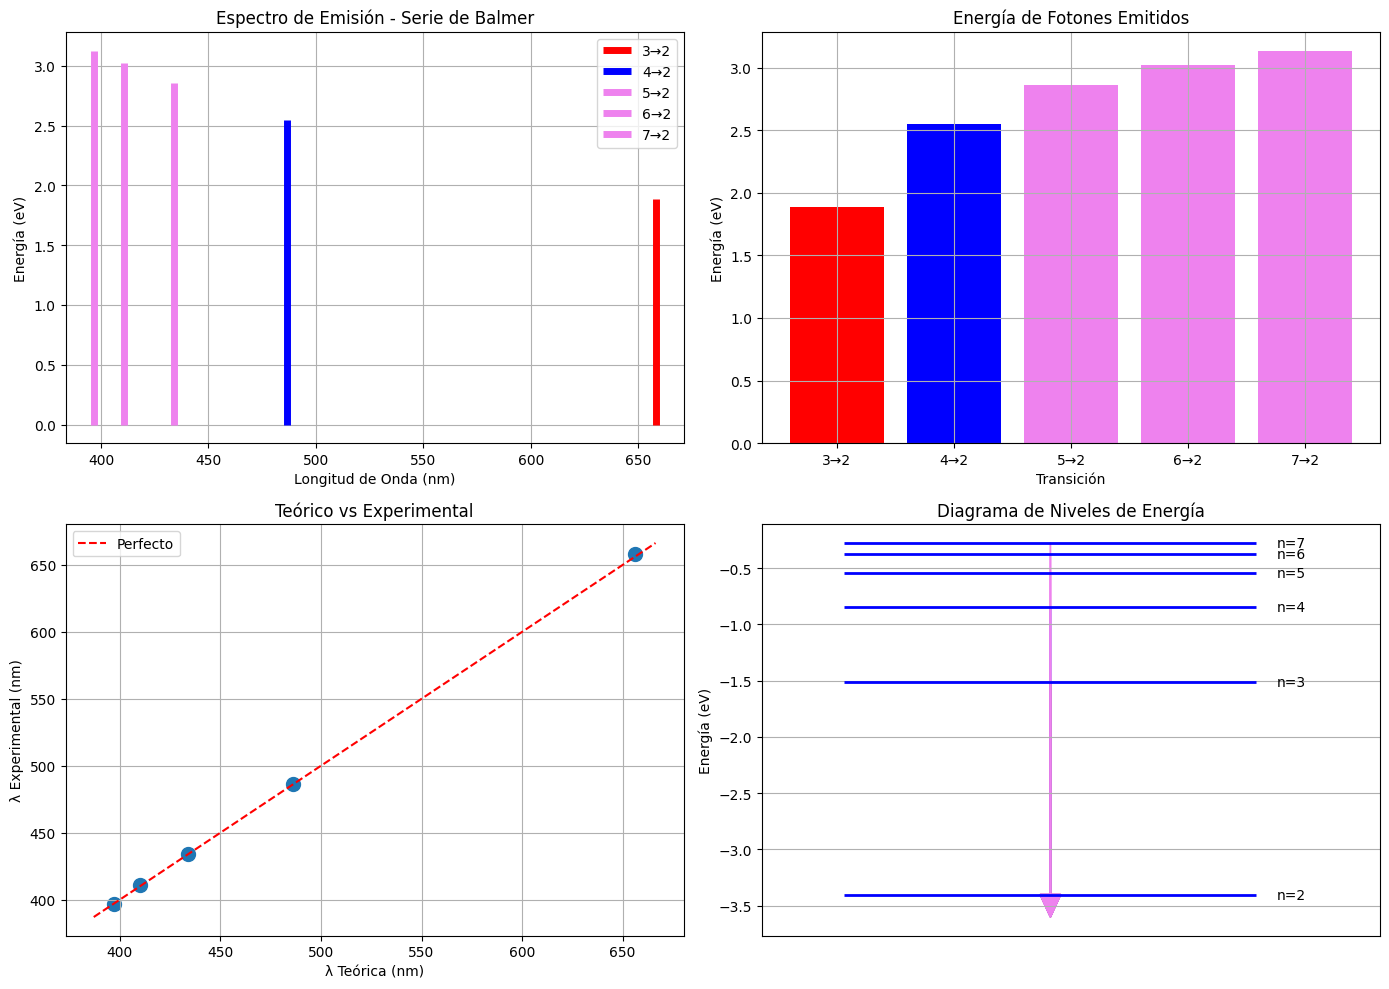

,transicion,n_superior,n_inferior,lambda_teorica_nm,lambda_experimental_nm,frecuencia_THz,energia_eV,color,error_nm,error_%
0,3→2,3,2,656.335460,658.074787,455.875238,1.885536,Rojo,1.739326,0.265006
1,4→2,4,2,486.174415,486.713001,616.379672,2.549396,Azul,0.538586,0.110780
2,5→2,5,2,434.084299,433.983352,691.270756,2.859151,Violeta,0.100947,0.023255
3,6→2,6,2,410.209663,410.653303,730.543254,3.021585,Violeta,0.443640,0.108150
4,7→2,7,2,397.042439,396.633304,756.366137,3.128391,Violeta,0.409135,0.103046


In [ ]:
def analisis_espectroscopico():
    """
    Analiza líneas espectrales del hidrógeno
    """
    # Constante de Rydberg
    R_H = 1.097e7  # m⁻¹
    c = 3e8  # m/s
    
    # Serie de Balmer (n=2)
    n1 = 2
    n2_valores = [3, 4, 5, 6, 7]
    
    datos = []
    for n2 in n2_valores:
        # Longitud de onda teórica
        lambda_inv = R_H * (1/n1**2 - 1/n2**2)
        lambda_teorica = 1 / lambda_inv
        
        # Longitud de onda experimental con error
        lambda_exp = lambda_teorica + np.random.normal(0, 1e-9)
        
        # Frecuencia y energía
        freq = c / lambda_exp
        energia = 6.626e-34 * freq / 1.602e-19  # eV
        
        # Color aproximado
        lambda_nm = lambda_exp * 1e9
        if lambda_nm < 450:
            color = 'Violeta'
        elif lambda_nm < 495:
            color = 'Azul'
        elif lambda_nm < 570:
            color = 'Verde'
        elif lambda_nm < 590:
            color = 'Amarillo'
        elif lambda_nm < 620:
            color = 'Naranja'
        else:
            color = 'Rojo'
        
        datos.append({
            'transicion': f'{n2}→{n1}',
            'n_superior': n2,
            'n_inferior': n1,
            'lambda_teorica_nm': lambda_teorica * 1e9,
            'lambda_experimental_nm': lambda_exp * 1e9,
            'frecuencia_THz': freq / 1e12,
            'energia_eV': energia,
            'color': color
        })
    
    df = pd.DataFrame(datos)
    
    # Calcular error
    df['error_nm'] = abs(df['lambda_experimental_nm'] - df['lambda_teorica_nm'])
    df['error_%'] = (df['error_nm'] / df['lambda_teorica_nm']) * 100
    
    print("\n" + "=" * 80)
    print("ANÁLISIS ESPECTROSCÓPICO - SERIE DE BALMER (HIDRÓGENO)")
    print("=" * 80)
    print(df.to_string())
    
    print("\nEstadísticas de errores:")
    print(f"Error promedio: {df['error_nm'].mean():.3f} nm")
    print(f"Error porcentual promedio: {df['error_%'].mean():.3f}%")
    
    print("\nAgrupación por color:")
    print(df.groupby('color').agg({
        'lambda_experimental_nm': ['min', 'max', 'count'],
        'energia_eV': 'mean'
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Espectro de emisión
    colores_mapa = {'Violeta': 'violet', 'Azul': 'blue', 'Verde': 'green',
                    'Rojo': 'red', 'Amarillo': 'yellow', 'Naranja': 'orange'}
    
    for idx, row in df.iterrows():
        axes[0, 0].vlines(row['lambda_experimental_nm'], 0, row['energia_eV'],
                         colors=colores_mapa.get(row['color'], 'black'),
                         linewidth=5, label=row['transicion'])
    axes[0, 0].set_xlabel('Longitud de Onda (nm)')
    axes[0, 0].set_ylabel('Energía (eV)')
    axes[0, 0].set_title('Espectro de Emisión - Serie de Balmer')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Energía vs transición
    axes[0, 1].bar(df['transicion'], df['energia_eV'], 
                   color=[colores_mapa.get(c, 'gray') for c in df['color']])
    axes[0, 1].set_xlabel('Transición')
    axes[0, 1].set_ylabel('Energía (eV)')
    axes[0, 1].set_title('Energía de Fotones Emitidos')
    axes[0, 1].grid(True)
    
    # Comparación teórica vs experimental
    axes[1, 0].scatter(df['lambda_teorica_nm'], df['lambda_experimental_nm'], s=100)
    lim_min = df['lambda_teorica_nm'].min() - 10
    lim_max = df['lambda_teorica_nm'].max() + 10
    axes[1, 0].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', label='Perfecto')
    axes[1, 0].set_xlabel('λ Teórica (nm)')
    axes[1, 0].set_ylabel('λ Experimental (nm)')
    axes[1, 0].set_title('Teórico vs Experimental')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Diagrama de niveles de energía
    for n in range(2, 8):
        E_n = -13.6 / n**2  # eV
        axes[1, 1].hlines(E_n, 0, 1, colors='blue', linewidth=2)
        axes[1, 1].text(1.05, E_n, f'n={n}', va='center')
    
    # Dibujar transiciones
    for idx, row in df.iterrows():
        n_sup = row['n_superior']
        n_inf = row['n_inferior']
        E_sup = -13.6 / n_sup**2
        E_inf = -13.6 / n_inf**2
        axes[1, 1].arrow(0.5, E_sup, 0, E_inf - E_sup, 
                        head_width=0.05, head_length=0.2, 
                        fc=colores_mapa.get(row['color'], 'black'),
                        ec=colores_mapa.get(row['color'], 'black'))
    
    axes[1, 1].set_xlim(-0.2, 1.3)
    axes[1, 1].set_ylabel('Energía (eV)')
    axes[1, 1].set_title('Diagrama de Niveles de Energía')
    axes[1, 1].set_xticks([])
    axes[1, 1].grid(True, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_espectroscopico()


ANÁLISIS DE CAMINATAS ALEATORIAS
   caminata_id  pasos_totales  posicion_final  desplazamiento_abs  posicion_max  posicion_min  rango  distancia_cuadratica
0            0           1000              12                  12            26           -26     52                   144
1            1           1000              18                  18            22            -7     29                   324
2            2           1000              22                  22            26            -9     35                   484
3            3           1000             -70                  70             5           -71     76                  4900
4            4           1000               0                   0            32           -16     48                     0
5            5           1000             -22                  22            15           -29     44                   484
6            6           1000             -12                  12             9           -36     45     

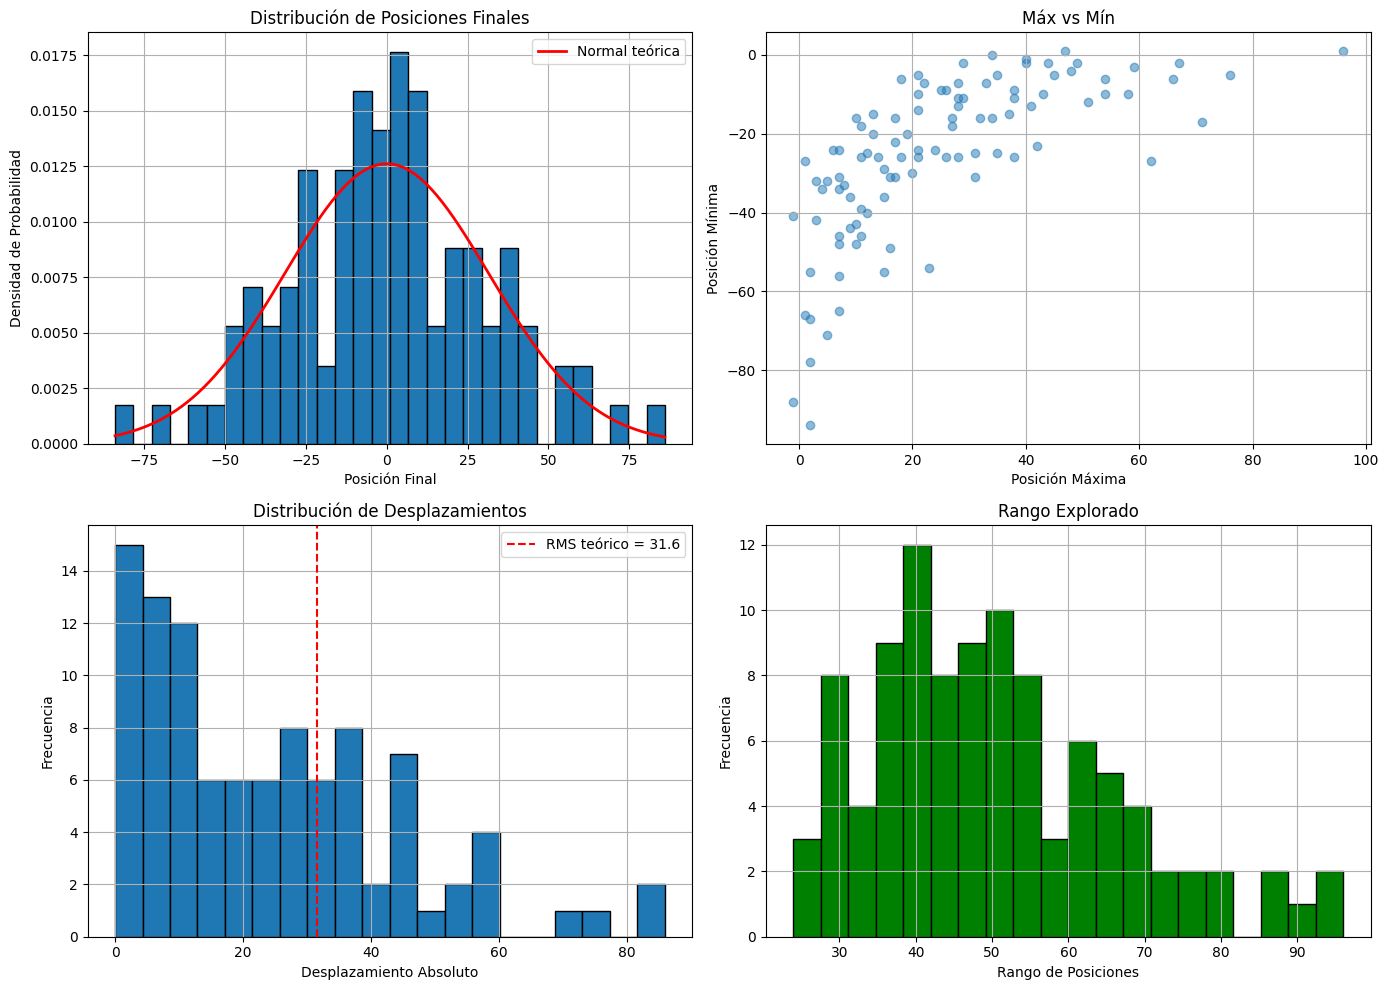

,caminata_id,pasos_totales,posicion_final,desplazamiento_abs,posicion_max,posicion_min,rango,distancia_cuadratica
0,0,1000,12,12,26,-26,52,144
1,1,1000,18,18,22,-7,29,324
2,2,1000,22,22,26,-9,35,484
3,3,1000,-70,70,5,-71,76,4900
4,4,1000,0,0,32,-16,48,0
...,...,...,...,...,...,...,...,...
95,95,1000,36,36,45,-5,50,1296
96,96,1000,44,44,47,1,46,1936
97,97,1000,28,28,43,-10,53,784
98,98,1000,-36,36,16,-49,65,1296


In [62]:

def simulacion_caminata_aleatoria():
    """
    Simula múltiples caminatas aleatorias y analiza estadísticas
    """
    n_pasos = 1000
    n_caminatas = 100
    
    datos = []
    
    for i in range(n_caminatas):
        pasos = np.random.choice([-1, 1], size=n_pasos)
        posicion = np.cumsum(pasos)
        
        datos.append({
            'caminata_id': i,
            'pasos_totales': n_pasos,
            'posicion_final': posicion[-1],
            'desplazamiento_abs': abs(posicion[-1]),
            'posicion_max': posicion.max(),
            'posicion_min': posicion.min(),
            'rango': posicion.max() - posicion.min()
        })
    
    df = pd.DataFrame(datos)
    
    # Calcular estadísticas
    df['distancia_cuadratica'] = df['posicion_final']**2
    
    print("\n" + "=" * 80)
    print("ANÁLISIS DE CAMINATAS ALEATORIAS")
    print("=" * 80)
    print(df.head(10).to_string())
    
    print("\nEstadísticas generales:")
    print(df.describe())
    
    print(f"\nDesplazamiento promedio: {df['posicion_final'].mean():.2f}")
    print(f"Desviación estándar: {df['posicion_final'].std():.2f}")
    print(f"RMS teórico: {np.sqrt(n_pasos):.2f}")
    print(f"RMS experimental: {np.sqrt(df['distancia_cuadratica'].mean()):.2f}")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].hist(df['posicion_final'], bins=30, edgecolor='black', density=True)
    # Distribución normal teórica
    x = np.linspace(df['posicion_final'].min(), df['posicion_final'].max(), 100)
    axes[0, 0].plot(x, 1/(np.sqrt(2*np.pi*n_pasos)) * np.exp(-x**2/(2*n_pasos)), 
                   'r-', linewidth=2, label='Normal teórica')
    axes[0, 0].set_xlabel('Posición Final')
    axes[0, 0].set_ylabel('Densidad de Probabilidad')
    axes[0, 0].set_title('Distribución de Posiciones Finales')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].scatter(df['posicion_max'], df['posicion_min'], alpha=0.5)
    axes[0, 1].set_xlabel('Posición Máxima')
    axes[0, 1].set_ylabel('Posición Mínima')
    axes[0, 1].set_title('Máx vs Mín')
    axes[0, 1].grid(True)
    
    axes[1, 0].hist(df['desplazamiento_abs'], bins=20, edgecolor='black')
    axes[1, 0].axvline(x=np.sqrt(n_pasos), color='r', linestyle='--', 
                       label=f'RMS teórico = {np.sqrt(n_pasos):.1f}')
    axes[1, 0].set_xlabel('Desplazamiento Absoluto')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Distribución de Desplazamientos')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    axes[1, 1].hist(df['rango'], bins=20, edgecolor='black', color='green')
    axes[1, 1].set_xlabel('Rango de Posiciones')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].set_title('Rango Explorado')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
simulacion_caminata_aleatoria()